# 상품군 : 침구

In [1]:
import pandas as pd 
import numpy as np 
import os 

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc

In [2]:
from timeseries_graph_functions import *  # 시각화용 함수 내가 만든것 불러오기 

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)    #과학적 표기법 안쓸래 
mpl.rcParams['axes.unicode_minus'] = False               # 마이너스 표기 오류 방지 

In [4]:
# 한글 폰트 깨짐 방지 
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()   
rc('font', family=font_name)
# plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
base_dir = "C:\\programming\\bigcontest_2020\\champion_league\\preprocess\\saejin"
excel_file = "원데이터 전처리.xlsx"

excel_dir = os.path.join(base_dir,excel_file)

In [6]:
raw_data = pd.read_excel(excel_dir, 
                             sheet_name = "Sheet1",
                             header = 0)

In [7]:
raw_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
0,1,2019-01-01 06:00:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,109.82,53
1,2,2019-01-01 06:00:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,130.05,110
2,3,2019-01-01 06:20:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,121.58,82
3,4,2019-01-01 06:20:00,20.00,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,144.68,174
4,5,2019-01-01 06:40:00,20.00,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000,20190101,...,1,1,화요일,Q1,1,겨울,20.00,0,143.31,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35370,38296,2019-12-31 23:20:00,20.00,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,1664000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,104.07,11
35371,38297,2019-12-31 23:40:00,20.00,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,9149000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,154.06,51
35372,38298,2019-12-31 23:40:00,20.00,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,15282000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,173.20,91
35373,38299,2019-12-31 23:40:00,20.00,100448,201384,무이자쿠첸압력밥솥 6인용,주방,158000,2328000,20191231,...,12,31,화요일,Q4,365,겨울,20.00,0,112.48,15


# 상품군 : 침구


In [8]:
bedclothes_raw = raw_data[raw_data['상품군'] == '침구']

In [9]:
focus_data = bedclothes_raw

In [10]:
focus_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 664 entries, 10381 to 31878
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  664 non-null    int64         
 1   방송일시        664 non-null    datetime64[ns]
 2   노출(분)       664 non-null    float64       
 3   마더코드        664 non-null    int64         
 4   상품코드        664 non-null    int64         
 5   상품명         664 non-null    object        
 6   상품군         664 non-null    object        
 7   판매단가        664 non-null    int64         
 8   취급액         664 non-null    int64         
 9   날짜          664 non-null    int64         
 10  시간          664 non-null    object        
 11  월           664 non-null    int64         
 12  일           664 non-null    int64         
 13  요일          664 non-null    object        
 14  분기          664 non-null    object        
 15  365일        664 non-null    int64         
 16  계절          664 non-

In [11]:
focus_data

,Unnamed: 0,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,날짜,...,월,일,요일,분기,365일,계절,방송시간,매진여부,취급액boxcox,최소판매수량
10381,11076,2019-04-18 12:00:00,20.00,100140,200377,보몽드 순면60수 피그먼트워싱 침구세트 SS,침구,59900,6400000,20190418,...,4,18,목요일,Q2,108,봄,20.00,0,141.95,107
10382,11077,2019-04-18 12:00:00,20.00,100140,200376,보몽드 순면60수 피그먼트워싱 침구세트 Q,침구,69900,6334000,20190418,...,4,18,목요일,Q2,108,봄,20.00,0,141.62,91
10383,11078,2019-04-18 12:00:00,20.00,100140,200375,보몽드 순면60수 피그먼트워싱 침구세트 K,침구,79900,7421000,20190418,...,4,18,목요일,Q2,108,봄,20.00,0,146.85,93
10384,11079,2019-04-18 12:20:00,20.00,100140,200377,보몽드 순면60수 피그먼트워싱 침구세트 SS,침구,59900,6825000,20190418,...,4,18,목요일,Q2,108,봄,20.00,0,144.06,114
10385,11080,2019-04-18 12:20:00,20.00,100140,200376,보몽드 순면60수 피그먼트워싱 침구세트 Q,침구,69900,7182000,20190418,...,4,18,목요일,Q2,108,봄,20.00,0,145.75,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31874,34520,2019-11-24 12:40:00,20.00,100143,200397,보몽드 카밀라 더블착번극세사 토퍼침구세트 SS(슈퍼싱글),침구,59900,8419000,20191124,...,11,24,일요일,Q4,328,가을,20.00,0,151.15,141
31875,34521,2019-11-24 13:00:00,20.00,100143,200396,보몽드 카밀라 더블착번극세사 토퍼침구세트 SK(슈퍼킹),침구,89900,10592000,20191124,...,11,24,일요일,Q4,328,가을,20.00,0,159.30,118
31876,34522,2019-11-24 13:00:00,20.00,100143,200394,보몽드 카밀라 더블착번극세사 토퍼침구세트 K(킹),침구,79900,10946000,20191124,...,11,24,일요일,Q4,328,가을,20.00,0,160.50,137
31877,34523,2019-11-24 13:00:00,20.00,100143,200395,보몽드 카밀라 더블착번극세사 토퍼침구세트 Q(퀸),침구,69900,15631000,20191124,...,11,24,일요일,Q4,328,가을,20.00,0,174.10,224


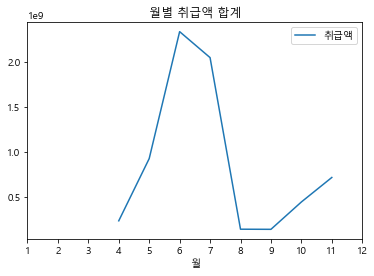

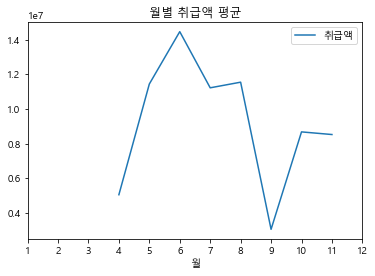

In [12]:
sales_by_month(focus_data)

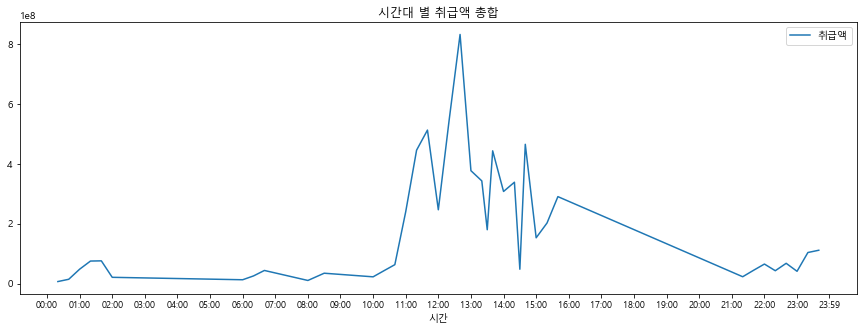

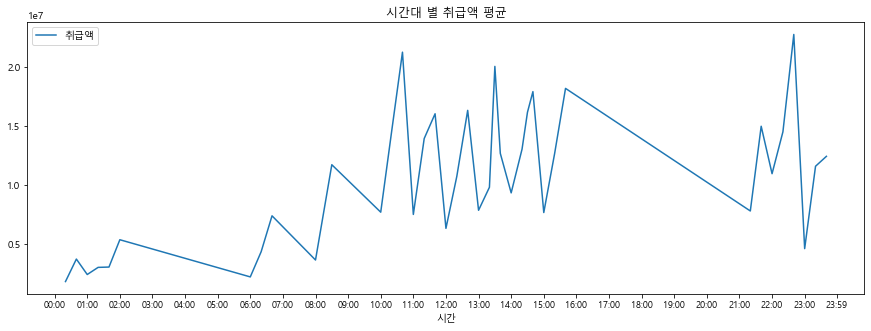

In [13]:
sales_by_time(focus_data)

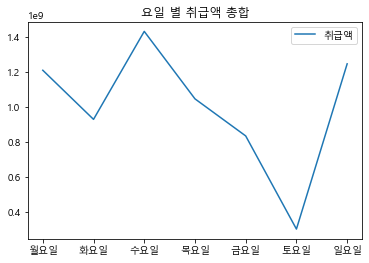

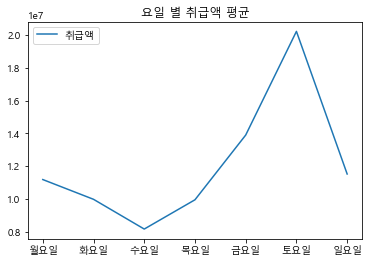

In [14]:
sales_by_yoill(focus_data)

AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 총합')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절 별 취급액 평균')


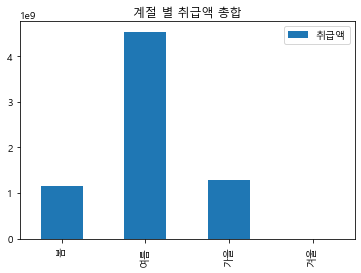

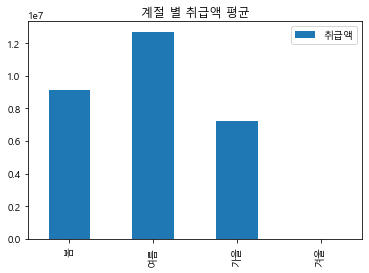

In [15]:
sales_by_season(focus_data)

In [16]:
soldout_by_season(focus_data)

    매진여부
계절      
가을     0
봄      0
여름     0


AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 총액')
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, '계절별 판매단가 평균')


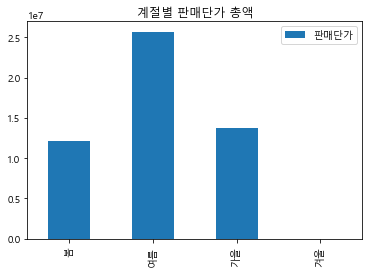

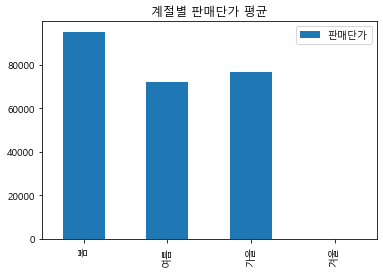

In [17]:
unitprice_by_season(focus_data)

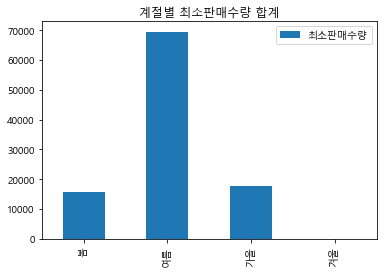

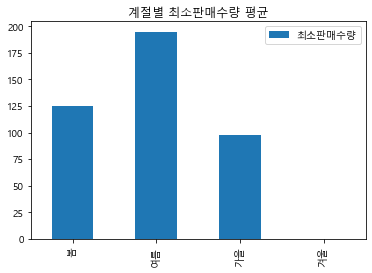

In [18]:
quantity_by_season(focus_data)

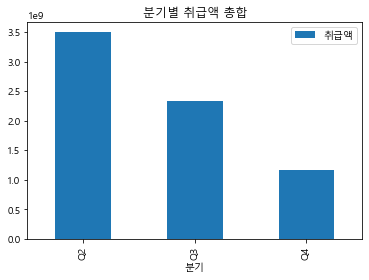

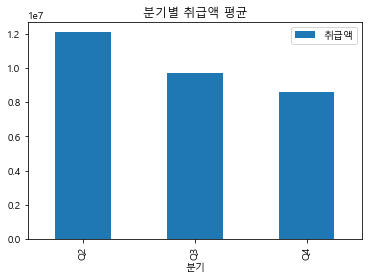

In [19]:
sales_by_Q(focus_data)

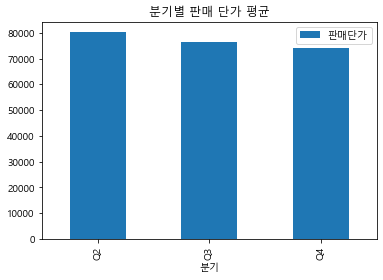

In [20]:
unitprice_by_Q(focus_data)

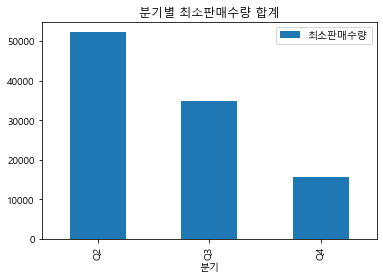

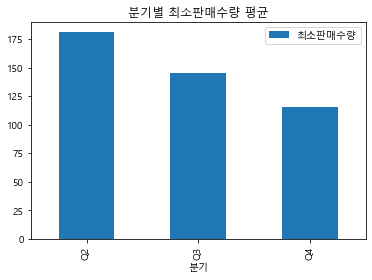

In [21]:
quantity_by_Q(focus_data)